회귀
독립변수 1개 = 단일 회귀 / 2개 이상 = 다중 회귀 

// 회귀 계수 결합이 선형 관계 = 선형 회귀 / 비선형 관계 = 비선형 회귀

1) 단순선형회귀: 평가 = 데이터의 잔차 합이 최소가 되는 모델을 만드는 것. 

파라미터 → 기울기(=가중치), y절편(=편향).

MSE(평균 제곱 오차): 선형회귀 평가 지표. 

값이 낮을수록 좋다! 값을 루트 씌운 RMSE가 더 많이 사용됨.

how? 정규방정식 또는 특이값 분해(SVD) / 경사하강법

경사하강법: training set을 이용한 학습 과정 중, 가중치 파라미터를 조금씩 반복적으로 조정. 

이때 비용함수(모델 평가함수)의 크기를 줄이는 방향으로 조정. 

반복문으로 코드 돌리기.

주의)학습 스텝을 너무 크게 잡으면x(크면 발산하게 되기 때문.) 

/ 가장 낮은 지점 = 글로벌 미니마.

배치 크기에 따라 3가지로 나뉨.(배치사이즈 = 파라미터 업데이트 위해 사용되는 학습 데이터 개수)

배치 경사강하법: 배치크기가 전체 학습데이터셋 크기와 같은. 즉 스텝 1번 발생. 빛, 방향정보가 포함되어 오류 발생가능성 증가.

확률적 경사하강법: : 한번의 스텝에 하나의 데이터에 대한 예측값을 실행한 후에 그 결과를 이용하여 그래디언트를 계산하고 파라미터를 조정

미니 배치 경사하강법: 최적의 배치크기는 경우에 따라 모두 다름. 배치크기를 어느정도 크게 하면 SGD 보다 파라미터의 움직임이 덜 불규칙적이 되며, 배치 경사하강법보다 빠르게 학습, 반면에 SGD에 비해 지역 최소값에 수렴할 위험도가 보다 커진다.

학습 스케줄? 큰 학습률에서 시작하고 학습속도가 느려질때 학습률을 낮추면 최적의 고정 학습률보다 더 좋은 솔루션을 빨리 발견 가능. 학습률(러닝레이트) 처음에는 넉넉하게 잡고, 그 후 판단을 통해 조정. → 최적화 함수 존재.(Adam 주로 사용)

2) 다항 회귀: 비선형 데이터를 선형회귀를 이용하여 학습하는 기법. 기존 데이터에 특성을 제곱하여 특성 확장. 

학습 곡선(과소적합): training set, validation set이 반대로 나타나는 경향 보이면 과소적합 의심.

학습 곡선(과대적합): 학습 진행됨에 따라 지나치게 긍정적인 방향으로 나타남. training set, validation set의 정확도 매우 낮게 나타남. training set에서 내려가고, validation set에서 올라가는 형태 보임.

3) 로지스틱 회귀: 이진분류. 시그모이드 함수(값을 0.5 기준으로 0/1로 구분하는 함수.)의 결과가 로지스틱 회귀 모델

4) 소프트맥스 회귀: 다중 클래스 분류. 

+ 프레딕트 프로바(predict_proba:분류가 무엇때문에 이루어졌는지 확인할 때 유용.)를 활용하여 값보고 프레딕트 사용하면 좋음.



# 파이썬에서 선형회귀(Linear regression)를 이용한 게 나이 예측하기
### 데이터셋 출처: https://github.com/boringariel/scikit-learn/blob/master/Data/CrabAgePrediction.csv

In [68]:
# 패키지 및 데이터 불러오기
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [69]:
reg = LinearRegression()

crab = pd.read_csv('C:/Users/BIG3-06/Documents/빅데이터/머신러닝/03_22/CrabAgePrediction.csv')
crab.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


<Axes: xlabel='Length', ylabel='Age'>

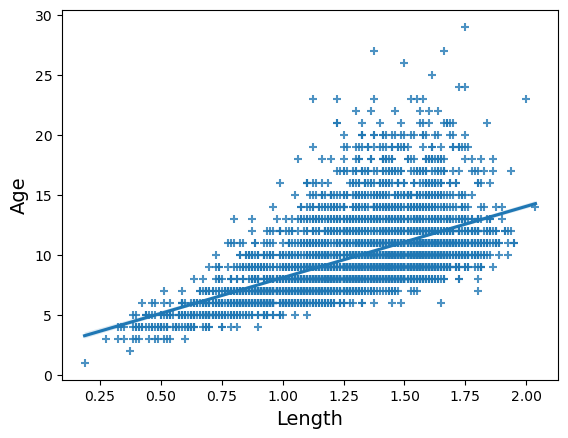

In [70]:
sns.regplot(data=crab, x='Length', y='Age', marker ='+')

In [71]:
reg.fit(crab['Length'].values.reshape(-1,1), crab['Age'])

LinearRegression()

In [72]:
reg.predict([[3]])

array([20.00245614])

# 실습1

In [ ]:
df = pd.read_excel('.data.xlsx')

In [ ]:
sns.regplot(data=df, x='', y='', marker='+')

In [ ]:
reg.fit(df[''].values.reshape(-1,1), df[''])

In [249]:
reg.predict([[.5]])

array([-0.19824383])

# 경사 하강법

In [78]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## 선형 회귀 모델과 경사 하강법

### 배치 경사 하강법

In [79]:
import numpy as np

np.random.seed(42)                     # 무작위성 지정

m = 100                                # 데이터셋 크기

X = 2 * np.random.rand(m, 1)           # 입력 데이터셋: 0에서 2 사이의 임의의 값 100개.
y = 4 + 3 * X + np.random.randn(m, 1)  # y = 4 + 3*X 함수를 이용한 타깃값 생성. 잡음 추가됨.

In [80]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)   # 절편과의 곱을 위해 필요한 1 추가
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [81]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [82]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # 절편과의 곱을 위한 1 추가.

y_predict = X_new_b @ theta_best #  y = X * theta # X : [1 x]
y_predict

array([[4.21509616],
       [9.75532293]])

In [83]:
eta = 0.1                            # 학습률
n_epochs = 1000                      # 에포크 수
m = len(X_b)                         # 훈련셋 크기

np.random.seed(42)

theta = np.random.randn(2, 1)        # 임의로 초기화된 파라미터. (2, 1) 모양의 어레이

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)  # MSE의 그레이디언트
    theta = theta - eta * gradients                # 파라미터 업데이트

In [84]:
theta

array([[4.21509616],
       [2.77011339]])

**학습률과 경사 하강법의 관계**

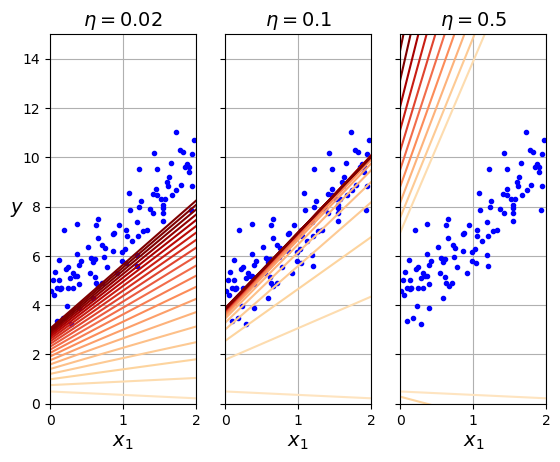

Learning Rate: 0.02, Convergence Time: 20.0 units
Learning Rate: 0.1, Convergence Time: 100.0 units
Learning Rate: 0.5, Convergence Time: 500.0 units


In [85]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# 아래 그래프를 그리는 함수
# 학습률이 지정되었을 때, 파라미터 수렴 과정을 직선의 수렴과정으로 그림.
def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")

    n_epochs = 1000 # 에포크 수
    n_shown = 20 # 아래 그래프에서 보이는 20개의 그래프 그리기 용도
    theta_path = [] # 훈련 과정동안 업데이트 되는 파라미터 수렴 과정 확인 용도

    # 경사 하강법 1000번 반복
    for epoch in range(n_epochs):
        # 첫 20개의 파라미터 업데이트 확인용 직선 그리기
        if epoch <n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle = "solid", color = color)

        # 경사 하강법
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients

        # 학습된 파라미터 저장
        theta_path.append(theta)
    
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path                # 저장된 파라미터 어레이 반환
np.random.seed(42)
theta = np.random.randn(2, 1)

plt.Figure(figsize=(10,4))

# 학습률: 0.02
plt.subplot(131)
plot_gradient_descent(theta, eta = 0.02)
plt.ylabel("$y$", rotation = 0)

# 학습률: 0.1
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta = 0.1)
plt.gca().axes.yaxis.set_ticklabels([])

# 학습률: 0.5
plt.subplot(133)
plot_gradient_descent(theta, eta = 0.5)
plt.gca().axes.yaxis.set_ticklabels([])

plt.show()

def calculate_gradient_descent_time(eta):
    num_iterations = 1000  # 경사 하강법 반복 횟수 (가상의 값)
    convergence_time = num_iterations * eta  # 종료 시간 계산
    
    return convergence_time

# 학습률 리스트
eta_list = [0.02, 0.1, 0.5]

# 각 학습률에 대한 종료 시간 출력
for eta in eta_list:
    convergence_time = calculate_gradient_descent_time(eta)
    print(f"Learning Rate: {eta}, Convergence Time: {convergence_time} units")


### 확률적 경사 하강법

- max_iter : 최대에포크 수
- tol : loss의 변화값이 tol 미만일 때 일찍 중지
- eta0 : 학습율
- n_iter_no_change : 지정한 반복 횟수동안 검증점수가 좋아 지지 않으면 훈련을 조기 종료


In [86]:
from sklearn.linear_model import SGDRegressor

In [87]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, eta0=0.01,
                       n_iter_no_change=100, random_state=42)

sgd_reg.fit(X, y.ravel()) # y.ravel(): 타깃값을 1차원 어레로 변환

SGDRegressor(n_iter_no_change=100, random_state=42, tol=1e-05)

In [88]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21353251]), array([2.77191196]))

# 직접구현

In [89]:
theta_path_sgd=[]

m = len(X_b)
np.random.seed(42)

In [90]:
n_epochs = 50 # 에포크 수
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

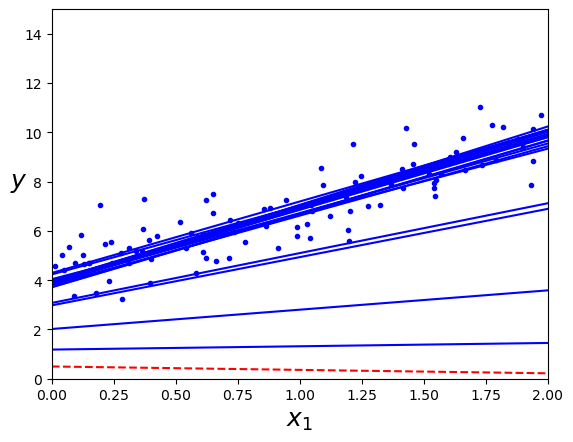

In [91]:
theta = np.random.randn(2,1)    # 파라미터 랜덤 초기화

for epoch in range(n_epochs):

    # 매 샘플에 대해 그레이디언트 계산 후 파라미터 업데이트
    for i in range(m):

        # 처음 20번 선형 모델(직선) 그리기
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)

        # 파라미터 업데이트 / 샘플 인덱스 랜덤 선택
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # 하나의 샘플에 대한 그레이디언트 계산
        eta = learning_schedule(epoch * m + i)        # 학습 스케쥴을 이용한 학습률 조정
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [92]:
theta

array([[4.21076011],
       [2.74856079]])

In [93]:
from math import ceil

n_epochs = 50         # 에포크 수
minibatch_size = 20   # 미니 배치 크기

n_batches_per_epoch = ceil(m / minibatch_size)  # 스텝 수

np.random.seed(42)
theta = np.random.randn(2, 1)  # 파라미터 무작위 초기화

# 학습 스케줄
t0, t1 = 200, 1000

def learning_schedule(t):
    return t0 / (t + t1)

# 미니 배치의 파라미터 수렴 과정
theta_path_mgd = []

# 미니 배치 경사 하강법 훈련
for epoch in range(n_epochs):

    # 무작위 섞기
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    # 미니 배치 경사 하강법 반복
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]  # 미니 배치 묶음
        yi = y_shuffled[idx : idx + minibatch_size]

        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi) # 그레이디언트
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

**경사 하강법 비교**

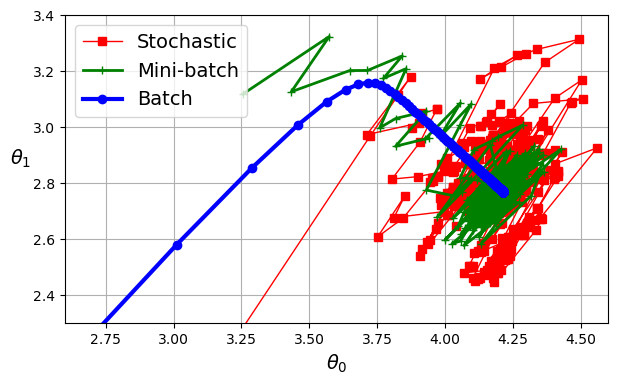

In [94]:
# 아래 그래프 그리기
# 세 종류의 경사 하강법에서 파라미터가 수렴하는 과정을 보여줌.

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
plt.show()

### Polynomial Regression 이해

In [95]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

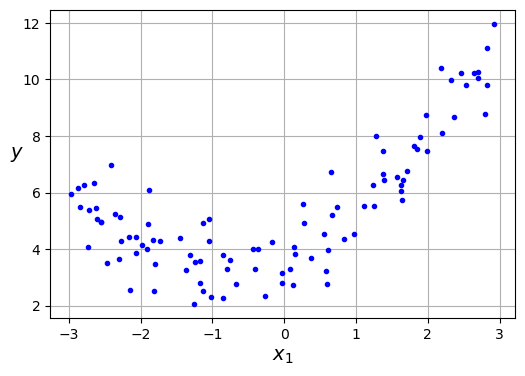

In [96]:
np.random.seed(42)
m=100
X = 6 * np.random.rand(m, 1) - 3  # -3에서 3 사이의 임의의 값 100개
y = 0.5 * X ** 2 + X + 4 + np.random.randn(m, 1)  # 2차 함수 활용. 잡음 추가됨. y = 0.5x^2 + x + 2

plt.figure(figsize=(6,4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
#plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

**사이킷런의 `PolynomialFeatures` 변환기**

지정된 차수까지 필요한 고차항을 새로운 특성으로 추가한다.

In [97]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [98]:
poly_features.fit_transform([[5]]) # x1 : 5 // x1 , x1^2 5, 25

array([[ 5., 25.]])

In [99]:
poly_features.fit_transform([[3,5]]) # x1 : 1, x2 : 3 / x1^2 : 1, x2^2 : 9, x1*x2 : 3

array([[ 3.,  5.,  9., 15., 25.]])

In [100]:
X_poly = poly_features.fit_transform(X)
X_poly

array([[-7.52759287e-01,  5.66646544e-01],
       [ 2.70428584e+00,  7.31316190e+00],
       [ 1.39196365e+00,  1.93756281e+00],
       [ 5.91950905e-01,  3.50405874e-01],
       [-2.06388816e+00,  4.25963433e+00],
       [-2.06403288e+00,  4.26023172e+00],
       [-2.65149833e+00,  7.03044338e+00],
       [ 2.19705687e+00,  4.82705891e+00],
       [ 6.06690070e-01,  3.68072842e-01],
       [ 1.24843547e+00,  1.55859111e+00],
       [-2.87649303e+00,  8.27421218e+00],
       [ 2.81945911e+00,  7.94934969e+00],
       [ 1.99465584e+00,  3.97865194e+00],
       [-1.72596534e+00,  2.97895634e+00],
       [-1.90905020e+00,  3.64447265e+00],
       [-1.89957294e+00,  3.60837736e+00],
       [-1.17454654e+00,  1.37955958e+00],
       [ 1.48538590e-01,  2.20637127e-02],
       [-4.08329888e-01,  1.66733298e-01],
       [-1.25262516e+00,  1.56906979e+00],
       [ 6.71117368e-01,  4.50398522e-01],
       [-2.16303684e+00,  4.67872835e+00],
       [-1.24713211e+00,  1.55533850e+00],
       [-8.

In [101]:
X[0]

array([-0.75275929])

In [102]:
X_poly[0]

array([-0.75275929,  0.56664654])

이제 선형 회귀 모델을 적용하면 적절한 절편 $\theta_0$ 과 가중치$\theta_1$ 과 $\theta_2$ 를 얻는다.

-  `intercept_` 인스턴스 변수: 절편 $\theta_0$
- `coef_` 인스턴스 변수: 가중치 $\theta_1$ 과 $\theta_2$

In [103]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)  # 다항 특성을 포함한 입력 데이터와 타겟 데이터를 사용하여 모델 학습
lin_reg.intercept_, lin_reg.coef_ # 학습된 모델의 절편과 계수 출력

(array([3.78134581]), array([[0.93366893, 0.56456263]]))

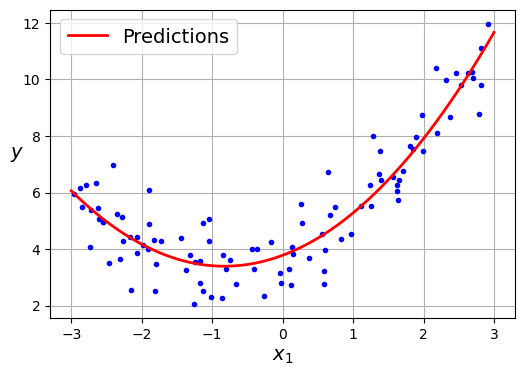

In [104]:
# 2차 함수 그래프 그리기
X_new = np.linspace(-3, 3, 100).reshape(100, 1)  # x1 값: -3에서 3 사이를 100등분해서 얻어지는 값.
X_new_poly = poly_features.transform(X_new)      # x1**2 추가
y_new = lin_reg.predict(X_new_poly)              # 예측 타깃값

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")  # 2차 함수 그래프
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
#plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

### Polynomial Regression을 이용한 Underfitting, Overfitting 이해
* 사이킷런의 아래 문서에서 예제를 차용함
* https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

**cosine 곡선에 약간의 Noise 변동값을 더하여 실제값 곡선을 만듬**

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [106]:
# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이터 입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) *0.1

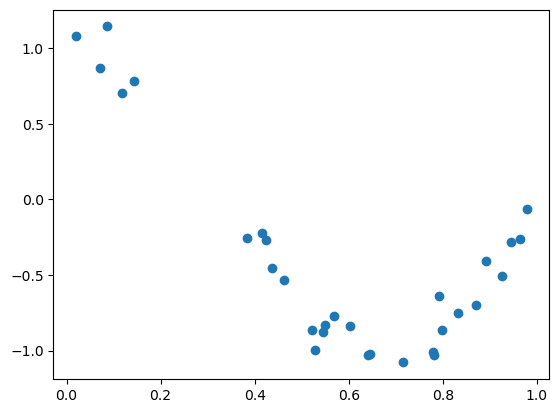

In [107]:
plt.scatter(X, y)


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSE 는 182815433.48 입니다.


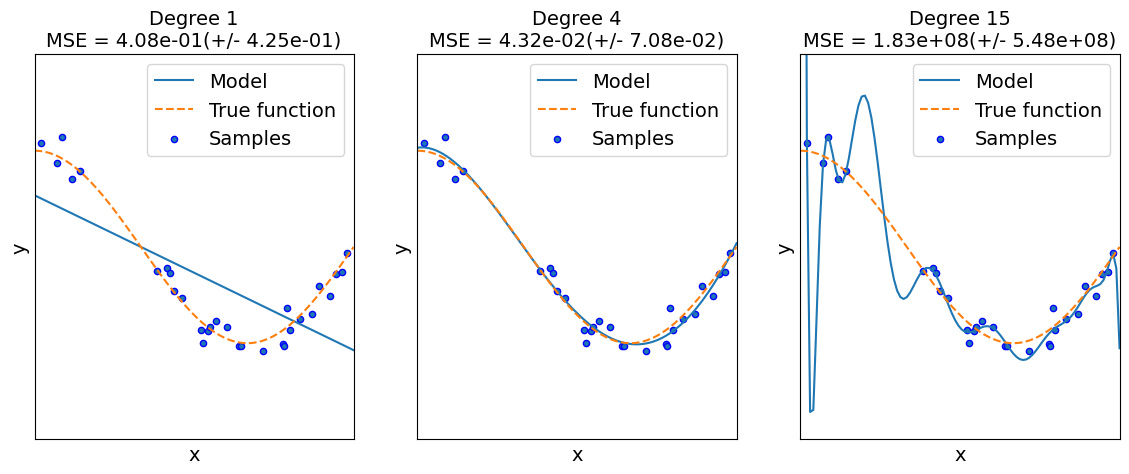

In [108]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1,1), y)

    # 교차 검증으로 다항 회귀를 평가합니다
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))

    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0,1,100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

# 실습2

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 다항 특성 추가
degree = 2  # 다항식 차수
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(x.values.reshape(-1, 1))

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# 다항 회귀 모델 학습
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 학습된 모델로 예측
y_pred = lin_reg.predict(X_test)
# X_test와 y_pred 데이터 크기 맞추기
min_size = min(len(X_test), len(y_pred))
X_test = X_test[:min_size]
y_pred = y_pred[:min_size]
# 모델 평가 (예시로 평균 제곱근 오차(RMSE) 사용)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], y_pred, color='red', alpha=0.5, label='Predicted')  # 모델 예측값 산점도
plt.scatter(X_test[:, 0], y_test[:min_size], alpha=0.5, label='Actual')  # 실제 데이터 산점도
plt.xlabel('')
plt.ylabel('')
plt.title('Scatter Plot of  vs.  with Polynomial Regression')
plt.legend()
plt.show()

In [110]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## 로지스틱 회귀
### 확률 추정

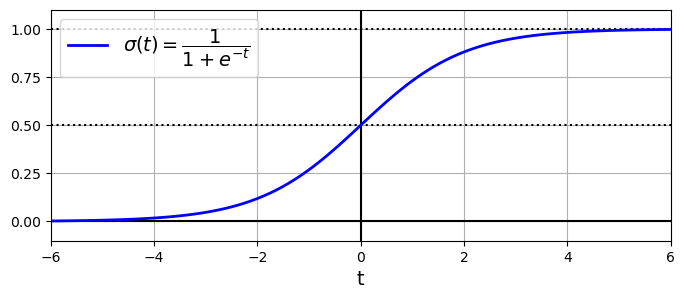

In [111]:
# extra code – generates and saves Figure 4–21

lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))
           
plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
plt.show()          

### 결정 경계

In [112]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

In [113]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

- petal width가 몇cm 이상일 때 양성?

In [115]:
X_new = np.linspace(0,3,1000).reshape(-1,1)  # 0~3 사이의 1000개 데이터 생성
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:,1]>=0.5][0,0]  # 확률값이 0.5이상인 경계선에 있는 X데이터 추출 --> 결정경계임
decision_boundary

1.6516516516516517

In [116]:
y_proba[:, 1] >= 0.5

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

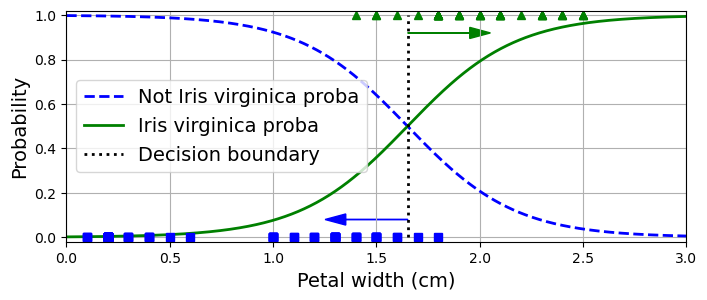

In [117]:
plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba") ## 파란 점선 (시그모이드 곡선)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba") ## 초록 선 (시그모이드 곡선)
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–21
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()

plt.show()

In [118]:
log_reg.predict([[2.0]])

array([ True])

In [119]:
log_reg.predict([[1.2]])

array([False])

컬럼 추가 (petal length (cm))

In [120]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=2, random_state=42)

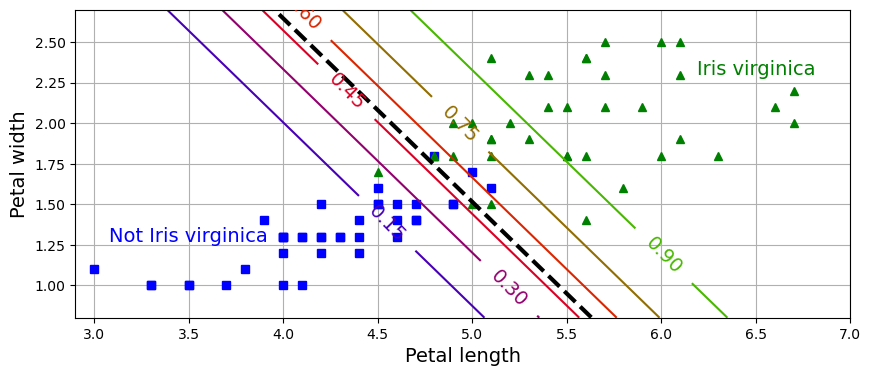

In [121]:
# 직선을 그리기 위한 데이터셋
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # x-좌표와 y-좌표를 묶어 2개의 특성으로 지정.
y_proba = log_reg.predict_proba(X_new) # 예측 확률: 음성 확률과 양성 확률의 튜플

# 버지니카로 판정될 양성 확률을 등고선 그릴 때 사용
zz = y_proba[:, 1].reshape(x0.shape)   # 양성 예측 확률만 사용

# 결정 경계: theta0 + x1 * theta1 + x2 * theta2 = 0 을 만족시키는 직선
left_right = np.array([2.9, 7]) # 직선상에 위치한 두 점의 x-좌표
# 두 점의 y-좌표 계산
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

# 그래프 그리기
plt.figure(figsize=(10, 4))

# 산점도: 파랑 네모. 버지니카가 아닌 샘플
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
# 산점도: 초록 세모. 버지니카인 샘플
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")

# 등고선: 버지니카일 확률 기준
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1) # 양성 확률 함께 표시

# 결정 경계 그리기
plt.plot(left_right, boundary, "k--", linewidth=3)

# 기타 문장 표시
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")

# 축 레이블 표시
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
plt.show()

# 실습3

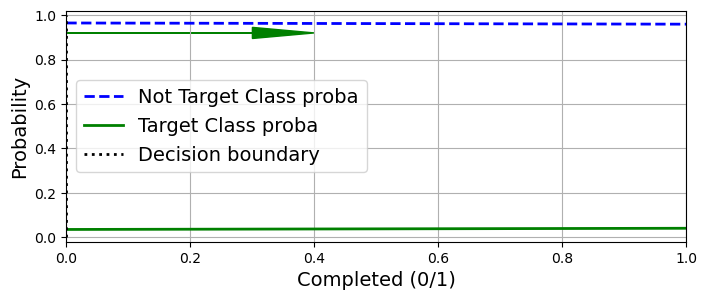

In [269]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 데이터 준비
X = df[''].values.reshape(-1, 1)  # 독립 변수
y = df[''].values  # 종속 변수 (이진 분류)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 로지스틱 회귀 모델 학습
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# 새로운 데이터에 대한 확률 계산
X_new = np.linspace(0, 1, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

# 결정 경계 계산
decision_boundary = X_new[np.argmax(y_proba[:, 1] >= 0.5)].item()  # 스칼라 값으로 가져오기

# 그래프 그리기
plt.figure(figsize=(8, 3))
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Target Class proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Target Class proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="Decision boundary")
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0, head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0, head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.xlabel("Completed (0/1)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 1, -0.02, 1.02])
plt.grid()

plt.show()


히트맵이나 다른 분석 결과와 유사하게 변수 간에 선형 관계가 없는 것으로 나타났다.

### 소프트맥스 회귀

- 소프트맥스 모델 훈련
    - `LogisticRegression` 모델을 다중 클래스 분류 모델로 훈련시키면 `multi_class='multinomial'` 옵션이
        자동 지정되어 소프트맥스 회귀를 적용함
    - `C=30`: 약한 규제

In [122]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [123]:
softmax_reg.predict([[5,2]])

array([2])

In [124]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

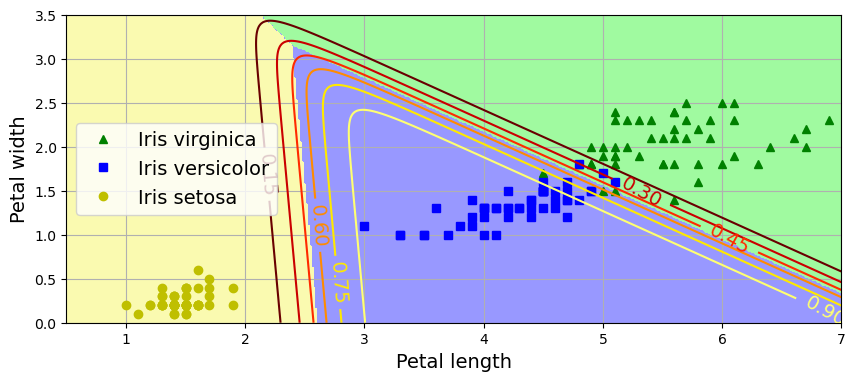

In [125]:
# 레이블 별 바탕화면 색 지정
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"]) # 노랑, 파랑, 초록

# 바탕화면을 그리기위한 좌표
# x-좌표
x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

# y-좌표
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

# `contour` 용 y-좌표: 버시컬러 확률 기준
zz1 = y_proba[:, 1].reshape(x0.shape)
# `contourf` 용 y-좌표: 예측값 기준
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

# 등고선 그리기: 색으로 구분. 예측 확률 기준
plt.contourf(x0, x1, zz, cmap=custom_cmap)
# 등고선 그리기: 버시컬러 품종일 가능성 확률 기준
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
plt.show()

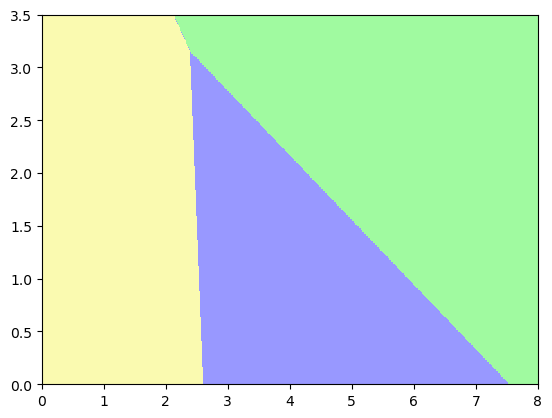

In [126]:
plt.contourf(x0, x1, zz, cmap=custom_cmap)

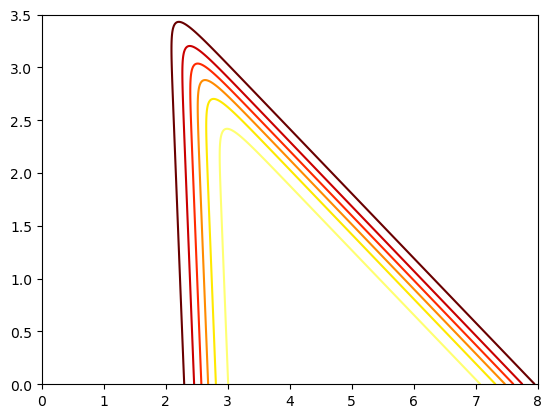

In [127]:
contour = plt.contour(x0, x1, zz1, cmap="hot")
contour

# 기계학습 모델 최적화를 위한 GridSearch, RandomSearch Cross Validation 알아보기

GridSearch Cross Validation

In [230]:
# import package
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [234]:
# input data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state=12345)
dt_clf = DecisionTreeClassifier()

# hyperparameter
parameters = {'max_depth' : range(1,5), 'min_samples_split' : range(2,5)}

Grid Search에 사용할 하이퍼파라미터는 딕셔너리 형태로 설정을 해 주는데요, 하이퍼파라미터의 이름을 key, 가능한 범위를 value 값으로 저장하면 됨.

3-fold CV를 이용해서 Grid Search 결과를 표현하는 작업

가장 정확도가 높게 나오는 조합을 자동으로 확정하고 싶다면, GridSearchCV를 실행할 때 refit=True 매개변수를 입력

In [237]:
# GridSearch Cross Validation
grid_dt = GridSearchCV(dt_clf, param_grid = parameters, cv=3, refit=True, return_train_score=True)
grid_dt.fit(X_train, y_train)

# GridSearchCV result
scores_df = pd.DataFrame(grid_dt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.683333,10,0.7,0.675,0.675
1,"{'max_depth': 1, 'min_samples_split': 3}",0.683333,10,0.7,0.675,0.675
2,"{'max_depth': 1, 'min_samples_split': 4}",0.683333,10,0.7,0.675,0.675
3,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,7,1.0,0.950,0.925
4,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,7,1.0,0.950,0.925
5,"{'max_depth': 2, 'min_samples_split': 4}",0.958333,7,1.0,0.950,0.925
6,"{'max_depth': 3, 'min_samples_split': 2}",0.966667,1,1.0,0.950,0.950
7,"{'max_depth': 3, 'min_samples_split': 3}",0.966667,1,1.0,0.950,0.950
8,"{'max_depth': 3, 'min_samples_split': 4}",0.966667,1,1.0,0.950,0.950
9,"{'max_depth': 4, 'min_samples_split': 2}",0.966667,1,1.0,0.950,0.950


In [242]:
# best params
print(f'best params:', grid_dt.best_params_)
print(f'best score {grid_dt.best_score_:.2%}')

best params: {'max_depth': 3, 'min_samples_split': 2}
best score 96.67%


RandomSearch Cross Validation

최적의 조합을 찾는 Random Search 방식을 이용하는 경우도 있는데요, 이는 무작위성에 의존하기 때문에 최적의 조합을 찾아낼 수 없는 경우도 있지만, 경우에 따라서 최소한의 시간과 컴퓨팅 파워의 투자로 만족스러운 결과를 얻어낼 수도 있음

In [243]:
# import package
from sklearn.model_selection import RandomizedSearchCV

random_dt = RandomizedSearchCV(estimator=dt_clf, param_distributions=parameters, n_iter=10,
                               cv=3, random_state=12345, n_jobs=-1)
random_dt.fit(X_train, y_train)

# RandomizedSearchCV result
scores_df = pd.DataFrame(random_dt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'min_samples_split': 4, 'max_depth': 3}",0.966667,1,1.0,0.950,0.950
1,"{'min_samples_split': 2, 'max_depth': 1}",0.683333,9,0.7,0.675,0.675
2,"{'min_samples_split': 2, 'max_depth': 2}",0.958333,7,1.0,0.950,0.925
3,"{'min_samples_split': 3, 'max_depth': 3}",0.966667,1,1.0,0.950,0.950
4,"{'min_samples_split': 4, 'max_depth': 4}",0.966667,1,1.0,0.950,0.950
5,"{'min_samples_split': 3, 'max_depth': 4}",0.966667,1,1.0,0.950,0.950
6,"{'min_samples_split': 2, 'max_depth': 3}",0.966667,1,1.0,0.950,0.950
7,"{'min_samples_split': 2, 'max_depth': 4}",0.966667,1,1.0,0.950,0.950
8,"{'min_samples_split': 3, 'max_depth': 2}",0.958333,7,1.0,0.950,0.925
9,"{'min_samples_split': 3, 'max_depth': 1}",0.683333,9,0.7,0.675,0.675


In [244]:
# best params
print(f'best params:', random_dt.best_params_)
print(f'best score {random_dt.best_score_:.2%}')

best params: {'min_samples_split': 4, 'max_depth': 3}
best score 96.67%
